In [1]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [54]:
'''
matlab colors
#DD6734
#0284C0
'''
yellow='#ffb200'
blue='#0284C0'
red='#DD5544'

name='all'

In [55]:
print('x\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
print('\t'.join([str(i) for i in range(9)]))

x	y	cx	cy	C	std	int	maxint	relBg
0	1	2	3	4	5	6	7	8


In [56]:
main_folder='C:/Users/jabuk/Documents/jaderka/ufe/results/'
main_folder2='C:/Users/jabuk/Documents/jaderka/ufe/data/M5_02/export_np/'
folder=main_folder+'all/'

# main_folder='C:/Users/jabuk/Documents/jaderka/ufe/data/'


# folder=main_folder+'M5_02/export_np/'
# main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
# folder=main_folder+'19_09_10_K4/export_np/'


In [100]:
# files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]

NP=100
files=[
#     main_folder2+'raw_09_1', #616
    main_folder+'M5/raw_17_1',  #612
    main_folder+'K4_19_09_10/raw_02_1', #652
    main_folder+'L3_02/raw_15_1', #730
]

# NP=80
# files=[
#     main_folder+'M5/raw_25_1',  #612
#     main_folder+'K4_19_09_10/raw_12_1', #652
#     main_folder+'L3_02/raw_20_1', #730
# ]
# NP=60
# files=[
#     main_folder+'M5/raw_33_1',  #616
#     main_folder+'K4_19_09_10/raw_19_1', #652
#     main_folder+'L3_02/raw_25_1', #730
# ]

# NP=40
# files=[
#     main_folder2+'raw_14_1',  #616
#     main_folder+'K4_19_09_10/raw_26_1', #650
#     main_folder+'L3/norm_21_1', #730
# ]

wls=[600, 650, 750]
# wls=[612, 652, 730]


print('position in dip')
data=[]
data_std=[]
data_stnr=[]
data_stnr_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    
    stnr=[]
    for row in info:
        stnr.append(row[6]/(row[0]*row[1]/2.93**2)/row[8])
    data_stnr.append(np.average(stnr))
    data_stnr_std.append(np.std(stnr))
    
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
17	6.2	6.5	4.23	4.28	3.41	0.00024	0.00260	0.00126	0.00019
n= 9	1.7	1.2	0.85	1.05	0.99	0.00002	0.00057	0.00020	0.00001
--------------------------------------------------------------------------------
02	20.2	14.1	6.50	7.10	3.62	0.00031	0.02888	0.00441	0.00025
n= 10	3.6	1.8	1.08	2.14	0.66	0.00003	0.00818	0.00101	0.00002
--------------------------------------------------------------------------------
08	32.5	13.8	6.29	6.39	3.94	0.00028	0.04540	0.00316	0.00023
n= 10	7.0	2.6	1.78	2.11	1.05	0.00002	0.01623	0.00103	0.00002
--------------------------------------------------------------------------------


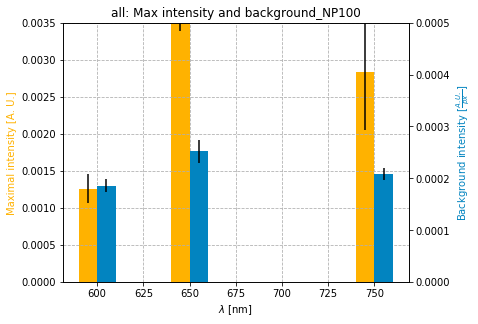

In [76]:
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]



w=10

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Max intensity and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.0035])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0005])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

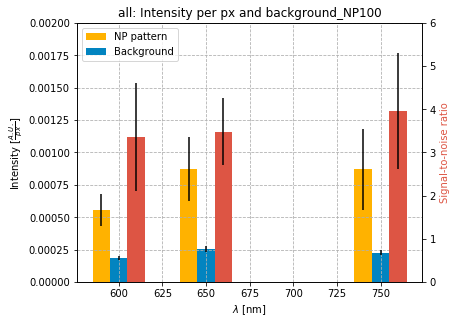

In [101]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per px and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]')
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Signal-to-noise ratio', color=red)
axesI.set_ylim([0, 6])

axes.bar([s-w for s in wls], data3, w, yerr=data3_std, color=yellow, label='NP pattern')
axes.bar([s for s in wls], data2, w, yerr=data2_std, color=blue,label='Background')

axes.legend(loc=2)

axesI.bar([s+w for s in wls], data_stnr, w, yerr=data_stnr_std, color=red,label='y')
# axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

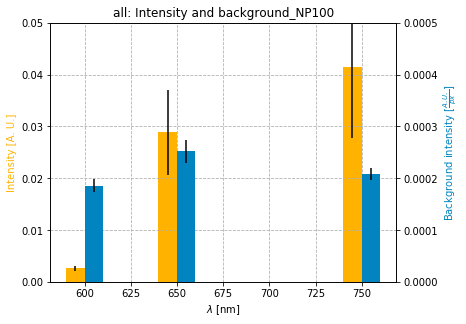

In [97]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.05])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0005])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

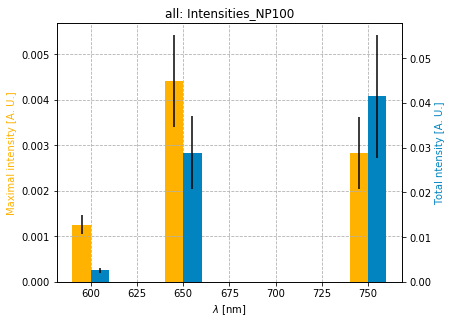

In [79]:
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)

axesI = axes.twinx()
axesI.set_ylabel('Total ntensity [A. U.]', color=blue)

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

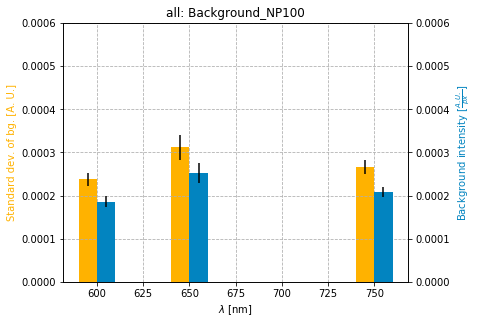

In [80]:
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0006])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0006])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# Different NP sizes

In [159]:
# wl=608
# nm=[16, 24, 39]  
# nps=[100, 80, 60]

wl=612
nm=[17, 25, 40]  
nps=[100, 80, 60]


files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]
data_stnr=[]
data_stnr_std=[]
data_area=[]
data_area_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    
    stnr=[]
    area=[]
    for row in info:
        stnr.append(row[6]/(row[0]*row[1]/2.93**2)/row[8])
        area.append(row[0]*row[1])
        
    data_stnr.append(np.average(stnr))
    data_stnr_std.append(np.std(stnr))
    
    data_area.append(np.average(area))
    data_area_std.append(np.std(area))
    
    
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
17	6.2	6.5	4.23	4.28	3.41	0.00024	0.00260	0.00126	0.00019
n= 9	1.7	1.2	0.85	1.05	0.99	0.00002	0.00057	0.00020	0.00001
--------------------------------------------------------------------------------
25	7.3	5.9	3.89	4.58	3.45	0.00027	0.00351	0.00147	0.00021
n= 2	1.5	0.0	0.23	0.48	0.31	0.00001	0.00038	0.00033	0.00000
--------------------------------------------------------------------------------
40	5.9	7.0	4.54	4.48	3.68	0.00029	0.00380	0.00168	0.00022
n= 10	1.3	1.9	1.93	1.45	1.52	0.00002	0.00191	0.00055	0.00001
--------------------------------------------------------------------------------


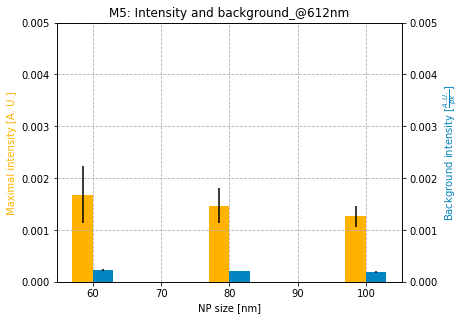

In [160]:
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.005])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.005])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

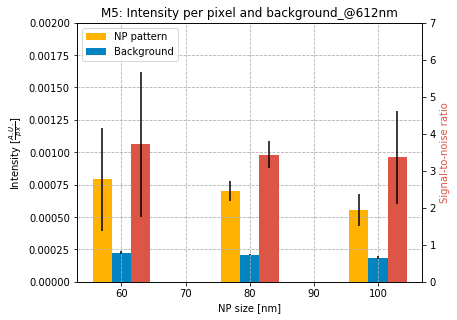

In [161]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per pixel and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color='black')
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Signal-to-noise ratio', color=red)
axesI.set_ylim([0, 7])


axes.bar([s-w for s in nps], data3, w, yerr=data3_std, color=yellow, label='NP pattern')
axes.bar([s for s in nps], data2, w, yerr=data2_std, color=blue,label='Background')

axes.legend(loc=2)

axesI.bar([s+w for s in nps], data_stnr, w, yerr=data_stnr_std, color=red,label='y')

fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

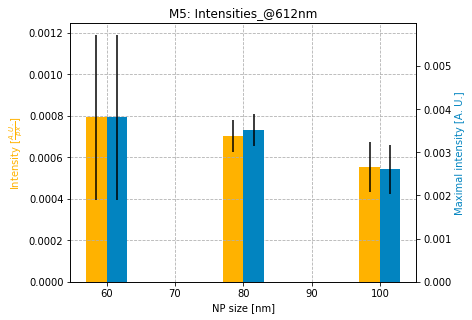

In [162]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
# axes.set_ylim([0, 0.12])

axesI = axes.twinx()
axesI.set_ylabel('Maximal intensity [A. U.]', color=blue)
# axesI.set_ylim([0, 0.12])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

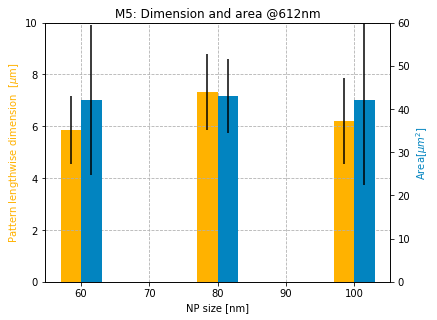

In [163]:
data1=[d[0] for d in data]
data1_std=[d[0] for d in data_std]
data2=[d[4] for d in data]
data2_std=[d[4] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Dimension and area @'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Pattern lengthwise dimension  [$\mu$m]',color=yellow)
axes.set_ylim([0, 10])

axesI = axes.twinx()
axesI.set_ylabel('Area[$\mu m^2$]', color=blue)
axesI.set_ylim([0, 60])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data_area, w, yerr=data_area_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# FPS change

In [95]:
fps=[10, 5, 2, 1]  

files=[folder+'norm_32_{}fps'.format(f) for f in fps]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
0f	32.5	8.5	2.87	3.53	2.34	0.00118	0.05709	0.00639	0.00094
n= 10	4.4	1.6	0.51	0.67	0.42	0.00002	0.01489	0.00090	0.00001
--------------------------------------------------------------------------------
5f	31.9	9.7	3.84	4.27	2.95	0.00093	0.06738	0.00569	0.00074
n= 10	3.1	2.6	0.56	1.13	0.75	0.00002	0.01801	0.00073	0.00002
--------------------------------------------------------------------------------
2f	34.0	13.2	4.53	4.56	3.05	0.00072	0.07840	0.00546	0.00058
n= 10	3.3	4.0	1.06	0.98	0.88	0.00002	0.01811	0.00081	0.00002
--------------------------------------------------------------------------------
1f	34.9	14.1	5.13	4.61	3.05	0.00064	0.08149	0.00540	0.00051
n= 10	3.8	1.8	0.89	0.63	0.44	0.00002	0.01574	0.00071	0.00002
--------------------------------------------------------------------------------


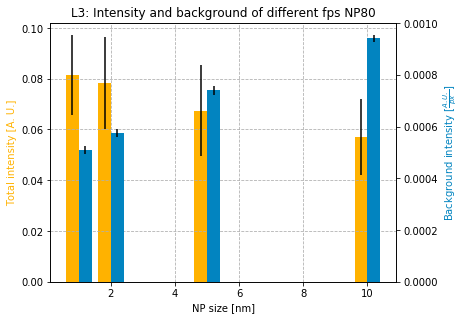

In [101]:
nps=[100, 80, 60]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.4

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background of different fps NP80'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Total intensity [A. U.]', color=yellow)
# axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
# axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in fps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in fps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')